#example 3.1

In [4]:
import pandas as pd
df = pd.DataFrame({'A': [0,0,0,0,0,1,1],
                'B': [1,2,3,5,4,2,5],
                'C': [5,3,4,1,1,2,3]})


a_group_desc = df.groupby('B').describe()
#groupby('B') without unstack()
print(a_group_desc)
#groupby('B') with unstack()
unstacked = a_group_desc.unstack()
print(unstacked)

      A                                               C                      \
  count mean       std  min   25%  50%   75%  max count mean       std  min   
B                                                                             
1   1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  5.0       NaN  5.0   
2   2.0  0.5  0.707107  0.0  0.25  0.5  0.75  1.0   2.0  2.5  0.707107  2.0   
3   1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  4.0       NaN  4.0   
4   1.0  0.0       NaN  0.0  0.00  0.0  0.00  0.0   1.0  1.0       NaN  1.0   
5   2.0  0.5  0.707107  0.0  0.25  0.5  0.75  1.0   2.0  2.0  1.414214  1.0   

                         
    25%  50%   75%  max  
B                        
1  5.00  5.0  5.00  5.0  
2  2.25  2.5  2.75  3.0  
3  4.00  4.0  4.00  4.0  
4  1.00  1.0  1.00  1.0  
5  1.50  2.0  2.50  3.0  
          B
A  count  1    1.0
          2    2.0
          3    1.0
          4    1.0
          5    2.0
              ... 
C  max    1    5.0
          2   

#example 3.2

In [5]:
import pandas as pd
df = pd.DataFrame({'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie','Indomie'],
                    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
                    'rating': [4, 4, 3.5, 15, 5]})

#original data
print("Data : \n")
print (df)

#seeing for each row whether is it duplicated or not
search = pd.DataFrame.duplicated(df)
print(search)
print("\n duplicated data (duplicated rows)\n")

#search for only duplicated rows
print (search[search == True])

#number of duplicated data
print (search.sum())

#removing duplicated data
print("\n removing duplicated data (duplicated rows) \n")
unique_data=df.drop_duplicates()
print(unique_data)

Data : 

     brand style  rating
0  Yum Yum   cup     4.0
1  Yum Yum   cup     4.0
2  Indomie   cup     3.5
3  Indomie  pack    15.0
4  Indomie  pack     5.0
0    False
1     True
2    False
3    False
4    False
dtype: bool

 duplicated data (duplicated rows)

1    True
dtype: bool
1

 removing duplicated data (duplicated rows) 

     brand style  rating
0  Yum Yum   cup     4.0
2  Indomie   cup     3.5
3  Indomie  pack    15.0
4  Indomie  pack     5.0


#example 3.3

In [6]:
import pandas as pd
import numpy as np
import copy
s = pd.DataFrame([1, 2, 3, np.NaN, 5, 6, None])

df = pd.DataFrame({'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', None],
                   'style': ['cup', None, 'cup', 'pack', 'pack'],
                   'rating': [4, 4, np.NaN, 15, 5]})

df1=df.copy()
#visualizing missing values : true means a detection of a missing data
print("visualizing missing values : true means a detection of a missing data")

### using loops :

# n=0
# for index, row in df.iterrows():
#     for column in df.columns:
#         cell_value = row[column]
#         if pd.isnull( cell_value):
#             print(f"value missed at :\ncolumn:{column}\nrow:{index} \n")
#             n+=1

### using dataframe built-in functions

#creating a boolean mask of the dataframe to identify rows of missing values
mask =df.isnull()

#isolating missing values
print ("isolating missing values")
print(df[mask.any(axis=1)])

#number of missing values per column and in total
print("total number of  missing values:",mask.any(axis=1).sum())
print("number of missing values per column:\n",mask.sum())

#filling the missing data with the mean value
print("filling the missing data with the mean value")
mean=df['rating'].mean()
for column in df.columns:
    df[column].fillna(value=mean,inplace=True)
print(df)

#removing rows containing missing values
print ("removing rows containing missing values")
print(df1.dropna())

visualizing missing values : true means a detection of a missing data
isolating missing values
     brand style  rating
1  Yum Yum  None     4.0
2  Indomie   cup     NaN
4     None  pack     5.0
total number of  missing values: 3
number of missing values per column:
 brand     1
style     1
rating    1
dtype: int64
filling the missing data with the mean value
     brand style  rating
0  Yum Yum   cup     4.0
1  Yum Yum   7.0     4.0
2  Indomie   cup     7.0
3  Indomie  pack    15.0
4      7.0  pack     5.0
removing rows containing missing values
     brand style  rating
0  Yum Yum   cup     4.0
3  Indomie  pack    15.0


#example 3.4

In [7]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer as Imputer

# Create an empty dataset
df = pd.DataFrame()

# Create two variables called x0 and x1. Make the first value of x1 a missing value
df['x0'] =[0.3051,0.4949,0.6974,0.3769,0.2231,0.341,0.4436,0.5897,0.6308,0.5]
df['x1'] =[np.nan,0.2654,0.2615,0.5846,0.4615,0.8308,0.4962,0.3269,0.5346,0.6731]

# View the dataset
print("Data before imputation :")
print(df)

# Create an imputer object that looks for 'Nan' values, then replaces them with the mean value of the feature by columns (axis=0)
print("chercher les valeurs manquantes par la moyenne de la colonne")
mean_imputer = Imputer(missing_values=np.nan, strategy='mean')

# Apply the imputer on the df dataset
mean_imputed_df = pd.DataFrame(mean_imputer.fit_transform(df), columns=df.columns)
print("data after imputation : mean")
print(mean_imputed_df)

#Change the imputer's strategy
print("data after imputation : median")
median_imputer = Imputer(missing_values=np.nan, strategy='median')
median_imputed_df=pd.DataFrame(median_imputer.fit_transform(df), columns=df.columns)
print(median_imputed_df)

Data before imputation :
       x0      x1
0  0.3051     NaN
1  0.4949  0.2654
2  0.6974  0.2615
3  0.3769  0.5846
4  0.2231  0.4615
5  0.3410  0.8308
6  0.4436  0.4962
7  0.5897  0.3269
8  0.6308  0.5346
9  0.5000  0.6731
chercher les valeurs manquantes par la moyenne de la colonne
data after imputation : mean
       x0        x1
0  0.3051  0.492733
1  0.4949  0.265400
2  0.6974  0.261500
3  0.3769  0.584600
4  0.2231  0.461500
5  0.3410  0.830800
6  0.4436  0.496200
7  0.5897  0.326900
8  0.6308  0.534600
9  0.5000  0.673100
data after imputation : median
       x0      x1
0  0.3051  0.4962
1  0.4949  0.2654
2  0.6974  0.2615
3  0.3769  0.5846
4  0.2231  0.4615
5  0.3410  0.8308
6  0.4436  0.4962
7  0.5897  0.3269
8  0.6308  0.5346
9  0.5000  0.6731


# example 3.5

In [8]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'A': [2,1,2,3,3,5,4],'B': [1,2,3,5,4,2,5],'C': [5,3,4,1,1,2,3]})
print(df)

#sorting data based on the column 'A'
print("sorting data based on the column 'A' ")
df = df.sort_values(by='A')
print (df)

#shuffling data
print("shuffling data")
index = df.index.tolist()
np.random.shuffle(index)
df = df.iloc[index]
df.reset_index(inplace=True,drop=True)
print (df)

   A  B  C
0  2  1  5
1  1  2  3
2  2  3  4
3  3  5  1
4  3  4  1
5  5  2  2
6  4  5  3
sorting data based on the column 'A' 
   A  B  C
1  1  2  3
0  2  1  5
2  2  3  4
3  3  5  1
4  3  4  1
6  4  5  3
5  5  2  2
shuffling data
   A  B  C
0  1  2  3
1  3  5  1
2  5  2  2
3  2  3  4
4  4  5  3
5  3  4  1
6  2  1  5


# example 3.6

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data'
names=['constructor','Model','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']

dataset = pd.read_csv(url, names=names)
print("data:")
print(dataset)
# Apply MIN MAX SCALING on MYCT et MMAX
data_to_scale = dataset[['MYCT', 'MMAX']]
minmax_scale = MinMaxScaler().fit(data_to_scale)
df_minmax = minmax_scale.transform(data_to_scale)
print("df_minmax")
print(df_minmax)
print('\n********** Normalisation*********\n')
print('Mean value after the Min max Scaling :\nMYCT={:.2f},MMAX={:.2f}'.format(df_minmax[:,0].mean(), df_minmax[:,1].mean()))
print('\n')
print('Minimal and Maximal value of the MYCT feature after minmax scaling: \nMIN={:.2f}, MAX={:.2f}'.format(df_minmax[:,0].min(), df_minmax[:,0].max()))
print('\n')
print('Minimal and Maximal value of the MMAX feature after minmax scaling: \nMIN={:.2f}, MAX={:.2f}'.format(df_minmax[:,1].min(), df_minmax[:,1].max()))
print("data after normalisation")
print(df_minmax)

data:
    constructor          Model  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  \
0       adviser          32/60   125   256   6000   256     16    128  198   
1        amdahl         470v/7    29  8000  32000    32      8     32  269   
2        amdahl        470v/7a    29  8000  32000    32      8     32  220   
3        amdahl        470v/7b    29  8000  32000    32      8     32  172   
4        amdahl        470v/7c    29  8000  16000    32      8     16  132   
..          ...            ...   ...   ...    ...   ...    ...    ...  ...   
204      sperry           80/8   124  1000   8000     0      1      8   42   
205      sperry  90/80-model-3    98  1000   8000    32      2      8   46   
206      sratus             32   125  2000   8000     0      2     14   52   
207        wang         vs-100   480   512   8000    32      0      0   67   
208        wang          vs-90   480  1000   4000     0      0      0   45   

     ERP  
0    199  
1    253  
2    253  
3    253  
4 

# example 3.7

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data'
names=['constructor','Model','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']
dataset = pd.read_csv(url, names=names)
print("data:")
print(dataset)
# Z-Score standardisation
std_scaler = StandardScaler()
data_to_std=dataset[['MYCT', 'MMAX']]
df_std = std_scaler.fit_transform(data_to_std)
print('\n********** Standardisation*********\n')
print('Mean and std value of the MYCT feature  after the standardisation:\nmean{:.2f}\nstd{:.2f}'.format(df_std[:,0].mean(),df_std[:,0].std()))
print('\n')
print('Mean and std value of the MMAX feature  after the standardisation:\nmean{:.2f}\nstd{:.2f}'.format(df_std[:,1].mean(),df_std[:,1].std()))
print('\n')
print('Minimal and Maximal value of the MYCT feature after standardisation: \nMIN={:.2f}, MAX={:.2f}'.format(df_std[:,0].min(), df_std[:,0].max()))
print('\n')
print('Minimal and Maximal value of the MMAX feature after standardisation: \nMIN={:.2f}, MAX={:.2f}'.format(df_std[:,1].min(), df_std[:,1].max()))
print('Values after standardisation')
print(df_std)

data:
    constructor          Model  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  \
0       adviser          32/60   125   256   6000   256     16    128  198   
1        amdahl         470v/7    29  8000  32000    32      8     32  269   
2        amdahl        470v/7a    29  8000  32000    32      8     32  220   
3        amdahl        470v/7b    29  8000  32000    32      8     32  172   
4        amdahl        470v/7c    29  8000  16000    32      8     16  132   
..          ...            ...   ...   ...    ...   ...    ...    ...  ...   
204      sperry           80/8   124  1000   8000     0      1      8   42   
205      sperry  90/80-model-3    98  1000   8000    32      2      8   46   
206      sratus             32   125  2000   8000     0      2     14   52   
207        wang         vs-100   480   512   8000    32      0      0   67   
208        wang          vs-90   480  1000   4000     0      0      0   45   

     ERP  
0    199  
1    253  
2    253  
3    253  
4 

# example 3.8

In [11]:
import pandas as pd
car_colors = pd.Series(['Blue', 'Red', 'Green'],dtype='category')
car_data = pd.Series(pd.Categorical(['Yellow', 'Green', 'Red', 'Blue','Purple'],categories=car_colors, ordered=False))
find_entries = pd.isnull(car_data)
print(car_colors)
print(car_data)
print(find_entries[find_entries == True])

0     Blue
1      Red
2    Green
dtype: category
Categories (3, object): ['Blue', 'Green', 'Red']
0      NaN
1    Green
2      Red
3     Blue
4      NaN
dtype: category
Categories (3, object): ['Blue', 'Green', 'Red']
0    True
4    True
dtype: bool


# example 3.9


In [28]:
import pandas as pd
car_colors = pd.Series(['Blue', 'Green', 'Red'],dtype='category')
car_data = pd.Series(pd.Categorical(['Blue', 'Green', 'Red', 'Green', 'Red', 'Green'],categories=car_colors, ordered=False))
car_data.cat.categories = ["Blue_Red", "Green", "Red"]
print (car_data.loc[car_data.isin(['Red'])])
car_data.loc[car_data.isin(['Red'])] = 'Blue_Red'
print (car_data)

2    Red
4    Red
dtype: category
Categories (3, object): ['Blue_Red', 'Green', 'Red']
0    Blue_Red
1       Green
2    Blue_Red
3       Green
4    Blue_Red
5       Green
dtype: category
Categories (3, object): ['Blue_Red', 'Green', 'Red']


<ipython-input-28-92e930757f46>:4: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  car_data.cat.categories = ["Blue_Red", "Green", "Red"]


# example 3.10

In [19]:
import pandas as pd
df = pd.DataFrame({'A': [2,3,1],'B': [1,2,3],'C': [5,3,4]})
df1 = pd.DataFrame({'A': [4],'B': [4],'C': [4]})
print("before concatenation:\n",df)
df = pd.concat([df,df1])
df = df.reset_index(drop=True)
print("after concatenation:\n",df)

df.loc[df.last_valid_index() + 1] = [5, 5, 5]
print
print (df)
df2 = pd.DataFrame({'D': [1, 2, 3, 4, 5]})
df = pd.DataFrame.join(df, df2)
print
print (df)

before concatenation:
    A  B  C
0  2  1  5
1  3  2  3
2  1  3  4
after concatenation:
    A  B  C
0  2  1  5
1  3  2  3
2  1  3  4
3  4  4  4
   A  B  C
0  2  1  5
1  3  2  3
2  1  3  4
3  4  4  4
4  5  5  5
   A  B  C  D
0  2  1  5  1
1  3  2  3  2
2  1  3  4  3
3  4  4  4  4
4  5  5  5  5


# example 3.11

In [20]:
import pandas as pd
df = pd.DataFrame({'A': [2,3,1],'B': [1,2,3],'C': [5,3,4]})
print(df)
print("remove data using row index")
#remove data using row index
df=df.drop(df.last_valid_index())
print (df)
print("remove data using column name")
#remove data using column name
df=df.drop(columns='A')
print (df)

   A  B  C
0  2  1  5
1  3  2  3
2  1  3  4
remove data using row index
   A  B  C
0  2  1  5
1  3  2  3
remove data using column name
   B  C
0  1  5
1  2  3


#example 3.12

In [21]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'Map': [0,0,0,1,1,2,2], 'Values':
[1,2,3,5,4,2,5]})
df['Sum'] = df.groupby('Map')['Values'].transform('sum')
df['Moy'] = df.groupby('Map')['Values'].transform('mean')
print (df)

   Map  Values  Sum  Moy
0    0       1    6  2.0
1    0       2    6  2.0
2    0       3    6  2.0
3    1       5    9  4.5
4    1       4    9  4.5
5    2       2    7  3.5
6    2       5    7  3.5


#example 3.13

In [22]:
from sklearn.datasets import load_iris
iris = load_iris()
import pandas as pd
import numpy as np
iris_nparray = iris.data
iris_dataframe = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_dataframe['group'] = pd.Series([iris.target_names[k] for k in iris.target], dtype="category")
print("IRIS data values:")
print(iris_dataframe)
print("Mean value :")
print (iris_dataframe.mean(numeric_only=True))
print("Median value :")
print (iris_dataframe.median(numeric_only=True))
print("Discretization based on equal quantiles:")
print(iris_dataframe.drop(columns=['group']).quantile(np.array([0,0.25,0.50,0.75,1])))

#The binning transforms numerical variables to categorical variables
iris_binned = pd.DataFrame()
for column in iris_dataframe.columns[:-1]:  # Exclude the 'group' column
    iris_binned[column] = pd.cut(iris_dataframe[column], bins=3)
print("Binning IrisData")
print(iris_binned)

#Get the frequency of each categorical variable
print("frequency of each categorical variable:")
category_counts = iris_binned.apply(pd.value_counts).fillna(0)
print("Frequency for each range of values:")
range_counts = pd.concat([iris_binned[column].value_counts().sort_index() for column in iris_binned.columns])
print(range_counts)


IRIS data values:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

         

#example 4.1

correlation scores of the features :
chi2 score  [ 10.81782088   3.7107283  116.31261309  67.0483602 ]
F - score score  [ 119.26450218   49.16004009 1180.16118225  960.0071468 ]
mutual info  [0.50648739 0.294294   0.98931974 0.99515514]


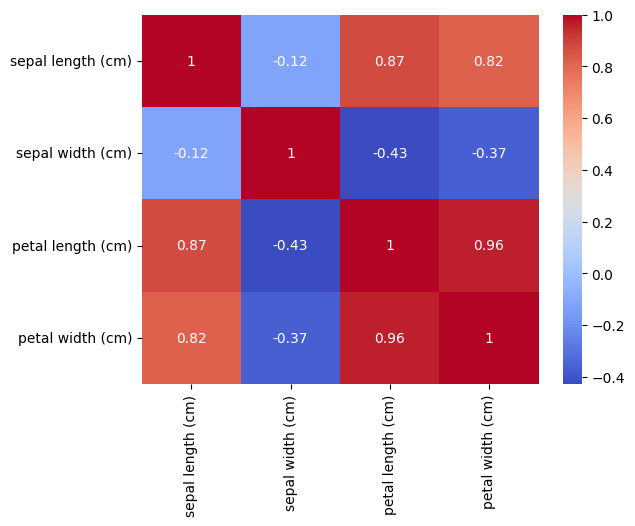

Reduced dataset based on selected features:
     petal length (cm)  sepal width (cm)
0                  1.4               3.5
1                  1.4               3.0
2                  1.3               3.2
3                  1.5               3.1
4                  1.4               3.6
..                 ...               ...
145                5.2               3.0
146                5.0               2.5
147                5.2               3.0
148                5.4               3.4
149                5.1               3.0

[150 rows x 2 columns]


In [23]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif, chi2,mutual_info_classif
from sklearn.datasets import load_iris

iris = load_iris()
X,y = iris.data, iris.target
chi2_score, chi_2_p_value = chi2(X,y)
f_score, f_p_value = f_classif(X,y)
mut_info_score = mutual_info_classif(X,y)
print("correlation scores of the features :")
print('chi2 score ', chi2_score)
print('F - score score ', f_score)
print('mutual info ', mut_info_score)
dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)
corr = dataframe.corr()

# Print heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

#Defining a dataset with a reduced dimension
selected_features = ['petal length (cm)', 'sepal width (cm)']
reduced_data = dataframe[selected_features]
print("Reduced dataset based on selected features:")
print(reduced_data)